In [1]:
import os
import json
from web3 import Web3, HTTPProvider

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from utils.subgraph_utils.convex_community import get_curve_fees
from utils.etherscan_utils import get_txes_between_blocks

In [2]:
ALCHEMY_API_KEY = os.environ['ALCHEMY_API_KEY']
web3 = Web3(HTTPProvider(f"https://eth-mainnet.alchemyapi.io/v2/{ALCHEMY_API_KEY}"))

In [3]:
pool_addr = "0xbEbc44782C7dB0a1A60Cb6fe97d0b483032FF1C7"
lp_token_addr = "0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490"
usdc_addr = "0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48"
dai_addr = "0x6B175474E89094C44Da98b954EedeAC495271d0F"
usdt_addr = "0xdAC17F958D2ee523a2206206994597C13D831ec7"

In [12]:
admin_2 = "0xA464e6DCda8AC41e03616F95f4BC98a13b8922Dc"
admin = "0xeCb456EA5365865EbAb8a2661B0c503410e9B347"

In [5]:
pool_addr.lower()

'0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7'

Need individual coin addrs:

In [27]:
with open("./usdc.json", 'r') as f:
    abi = json.load(f)
usdc = web3.eth.contract(address=usdc_addr, abi=abi)

with open("./usdt.json", 'r') as f:
    abi = json.load(f)
usdt = web3.eth.contract(address=usdt_addr, abi=abi)

with open("./dai.json", 'r') as f:
    abi = json.load(f)
dai = web3.eth.contract(address=dai_addr, abi=abi)

In [7]:
subgraph_tripool_fees = get_curve_fees(pool_token_addr=lp_token_addr)
blocks = list([int(i) for i in subgraph_tripool_fees.block.values])
subgraph_block_ranges = list(zip(blocks, blocks[1:]))
subgraph_tripool_fees.index = subgraph_tripool_fees.block

get all blocks where transactions happen in tripool:

In [13]:
ecb_txes = get_txes_between_blocks(address=admin.lower(), from_block=blocks[0], to_block=blocks[-1])
ecb_tx_blocks = [int(i['blockNumber']) for i in ecb_txes]
ecb_tx_blocks

[12730716,
 12730729,
 12731126,
 12731135,
 12731141,
 12731150,
 12731183,
 12737439,
 12737458,
 12737484,
 12737493,
 12737510,
 12737516,
 12737526,
 12768210,
 12776169,
 12776192,
 12776212,
 12776222,
 12776234,
 12776246,
 12776269,
 12808930,
 12808930,
 12823285,
 12823301,
 12823319,
 12823331,
 12823347,
 12823354,
 12823388,
 12828194,
 12828214,
 12871333,
 12871347,
 12871427,
 12871442,
 12871457,
 12871469,
 12871512,
 12916292,
 12916437,
 12916447,
 12916458,
 12916468,
 12916476,
 12916485,
 12916494,
 12916501,
 12916510,
 12916520,
 12916530,
 12916539,
 12916552,
 12916566,
 12916578,
 12916586,
 12916594,
 12916603,
 12916614,
 12916625,
 12916638,
 12916656,
 12916665,
 12916678,
 12916686,
 12916698,
 12916710,
 12916722,
 12916731,
 12916759,
 12916780,
 12916791,
 12916803,
 12916819,
 12916831,
 12916841,
 12916848,
 12916910,
 12916943,
 12916965,
 12916974,
 12917005,
 12917023,
 12953882,
 12953891,
 12954443,
 12954457,
 12954467,
 12954481,
 12954514,

In [14]:
admin_2_txes = get_txes_between_blocks(address=admin_2.lower(), from_block=blocks[0], to_block=blocks[-1])
admin_2_tx_blocks = [int(i['blockNumber']) for i in admin_2_txes]
admin_2_tx_blocks

[12694201,
 12694382,
 12694488,
 12694780,
 12694827,
 12695034,
 12695101,
 12695136,
 12695287,
 12695296,
 12695523,
 12695574,
 12695649,
 12695669,
 12695924,
 12695926,
 12695957,
 12696043,
 12696254,
 12696307,
 12696538,
 12696612,
 12696614,
 12696636,
 12696689,
 12696776,
 12696829,
 12696943,
 12696967,
 12697184,
 12697233,
 12697242,
 12697297,
 12698559,
 12698627,
 12698766,
 12698769,
 12699015,
 12699035,
 12699056,
 12699059,
 12699085,
 12699227,
 12699251,
 12699267,
 12699348,
 12699397,
 12699450,
 12699466,
 12699466,
 12699509,
 12699625,
 12699644,
 12699676,
 12699885,
 12699889,
 12699919,
 12699955,
 12699956,
 12700046,
 12700087,
 12700089,
 12700092,
 12700103,
 12700182,
 12700214,
 12700244,
 12700245,
 12700254,
 12700320,
 12700320,
 12700344,
 12700362,
 12700377,
 12700409,
 12700471,
 12700500,
 12700532,
 12700566,
 12700571,
 12700627,
 12700639,
 12700660,
 12700689,
 12700721,
 12700742,
 12700744,
 12700767,
 12700778,
 12700792,
 12700851,

In [33]:
tx_blocks = list(set(ecb_tx_blocks) - set(admin_2_tx_blocks))
tx_blocks = sorted(tx_blocks)
tx_blocks

[12730716,
 12730729,
 12731126,
 12731135,
 12731141,
 12731150,
 12731183,
 12737439,
 12737458,
 12737484,
 12737493,
 12737510,
 12737516,
 12737526,
 12768210,
 12776169,
 12776192,
 12776212,
 12776222,
 12776234,
 12776246,
 12776269,
 12808930,
 12823285,
 12823301,
 12823319,
 12823331,
 12823347,
 12823354,
 12823388,
 12828194,
 12828214,
 12871333,
 12871347,
 12871427,
 12871442,
 12871457,
 12871469,
 12871512,
 12916292,
 12916437,
 12916447,
 12916458,
 12916468,
 12916476,
 12916485,
 12916494,
 12916501,
 12916510,
 12916520,
 12916530,
 12916539,
 12916552,
 12916566,
 12916578,
 12916586,
 12916594,
 12916603,
 12916614,
 12916625,
 12916638,
 12916656,
 12916665,
 12916678,
 12916686,
 12916698,
 12916710,
 12916722,
 12916731,
 12916759,
 12916780,
 12916791,
 12916803,
 12916819,
 12916831,
 12916841,
 12916848,
 12916910,
 12916943,
 12916965,
 12916974,
 12917005,
 12917023,
 12953882,
 12953891,
 12954443,
 12954457,
 12954467,
 12954481,
 12954514,
 12973135,

In [35]:
fees_for_range = []
for block in tx_blocks:

    block_start = block - 1
    block_end = block + 1

    print(f"Chain checkoooor-ing blocks: {block_start}:{block_end}")

    usdc_transfer_filter = usdc.events.Transfer.createFilter(
        fromBlock=block_start,
        toBlock=block_end
    )
    all_transfers = usdc_transfer_filter.get_all_entries()
    usdc_fees = 0
    for transfer in all_transfers:

        to_address = transfer['args']['to']
        from_address = transfer['args']['from']
        value = transfer['args']['value']
        block = transfer['blockNumber']

        if (
                from_address == pool_addr and
                to_address in [admin_2, admin]
        ):
            print(f"usdc fees: {value * 1e-6}")
            usdc_fees += value * 1e-6

    usdt_transfer_filter = usdt.events.Transfer.createFilter(
        fromBlock=block_start,
        toBlock=block_end
    )
    all_transfers = usdt_transfer_filter.get_all_entries()
    usdt_fees = 0
    for transfer in all_transfers:

        to_address = transfer['args']['to']
        from_address = transfer['args']['from']
        value = transfer['args']['value']
        block = transfer['blockNumber']

        if (
                from_address == pool_addr and
                to_address in [admin_2, admin]
        ):
            print(f"usdt fees: {value * 1e-6}")
            usdt_fees += value * 1e-6

    dai_transfer_filter = dai.events.Transfer.createFilter(
        fromBlock=block_start,
        toBlock=block_end
    )
    all_transfers = dai_transfer_filter.get_all_entries()
    dai_fees = 0
    for transfer in all_transfers:

        to_address = transfer['args']['to']
        from_address = transfer['args']['from']
        value = transfer['args']['value']
        block = transfer['blockNumber']

        if (
                from_address == pool_addr and
                to_address in [admin_2, admin]
        ):
            print(f"dai fees: {value * 1e-18}")
            dai_fees += value * 1e-18

    dict_fees = {
        'block_start': block_start,
        'block_end': block_end,
        'usdc_fees': usdc_fees,
        'dai_fees': dai_fees,
        'usdt_fees': usdt_fees
    }
    fees_for_range.append(dict_fees)

df_fees = pd.DataFrame(fees_for_range)
df_fees

Chain checkoooor-ing blocks: 12730715:12730717
usdc fees: 45908.335846999995
usdt fees: 37059.925671
dai fees: 28464.211362628434
Chain checkoooor-ing blocks: 12730728:12730730
Chain checkoooor-ing blocks: 12731125:12731127
Chain checkoooor-ing blocks: 12731134:12731136
Chain checkoooor-ing blocks: 12731140:12731142
Chain checkoooor-ing blocks: 12731149:12731151
Chain checkoooor-ing blocks: 12731182:12731184
Chain checkoooor-ing blocks: 12737438:12737440
usdc fees: 13198.698354999999
usdt fees: 11916.093541
dai fees: 14966.826290050489
Chain checkoooor-ing blocks: 12737457:12737459
Chain checkoooor-ing blocks: 12737483:12737485
Chain checkoooor-ing blocks: 12737492:12737494
Chain checkoooor-ing blocks: 12737509:12737511
Chain checkoooor-ing blocks: 12737515:12737517
Chain checkoooor-ing blocks: 12737525:12737527
Chain checkoooor-ing blocks: 12768209:12768211
Chain checkoooor-ing blocks: 12776168:12776170
usdc fees: 43492.565071
usdt fees: 39988.563353
dai fees: 27325.225990582094
Chain

,block_start,block_end,usdc_fees,dai_fees,usdt_fees
0,12730715,12730717,45908.335847,28464.211363,37059.925671
1,12730728,12730730,0.000000,0.000000,0.000000
2,12731125,12731127,0.000000,0.000000,0.000000
3,12731134,12731136,0.000000,0.000000,0.000000
4,12731140,12731142,0.000000,0.000000,0.000000
...,...,...,...,...,...
243,13590307,13590309,0.000000,0.000000,0.000000
244,13590316,13590318,0.000000,0.000000,0.000000
245,13590325,13590327,0.000000,0.000000,0.000000
246,13590334,13590336,0.000000,0.000000,0.000000


In [39]:
df_fees['total_fees'] = df_fees.usdc_fees + df_fees.usdt_fees + df_fees.dai_fees
df_fees.index = df_fees.block_end
df_fees = df_fees.where(df_fees.total_fees > 0).dropna()
df_fees

,block_start,block_end,usdc_fees,dai_fees,usdt_fees,total_fees
block_end,,,,,,
12730717.0,12730715.0,12730717.0,45908.335847,28464.211363,37059.925671,111432.472881
12737440.0,12737438.0,12737440.0,13198.698355,14966.826290,11916.093541,40081.618186
12776170.0,12776168.0,12776170.0,43492.565071,27325.225991,39988.563353,110806.354415
12823286.0,12823284.0,12823286.0,41943.105281,30231.635935,39671.209009,111845.950225
12871334.0,12871332.0,12871334.0,61722.384466,26793.390692,37810.019532,126325.794690
12916293.0,12916291.0,12916293.0,49614.099512,34700.322678,57953.247147,142267.669337
12916438.0,12916436.0,12916438.0,42.748106,68.180169,30.483175,141.411450
12953883.0,12953881.0,12953883.0,74332.180771,31166.934307,50081.508762,155580.623840
13001901.0,13001899.0,13001901.0,51861.562014,53993.348089,57986.839595,163841.749698


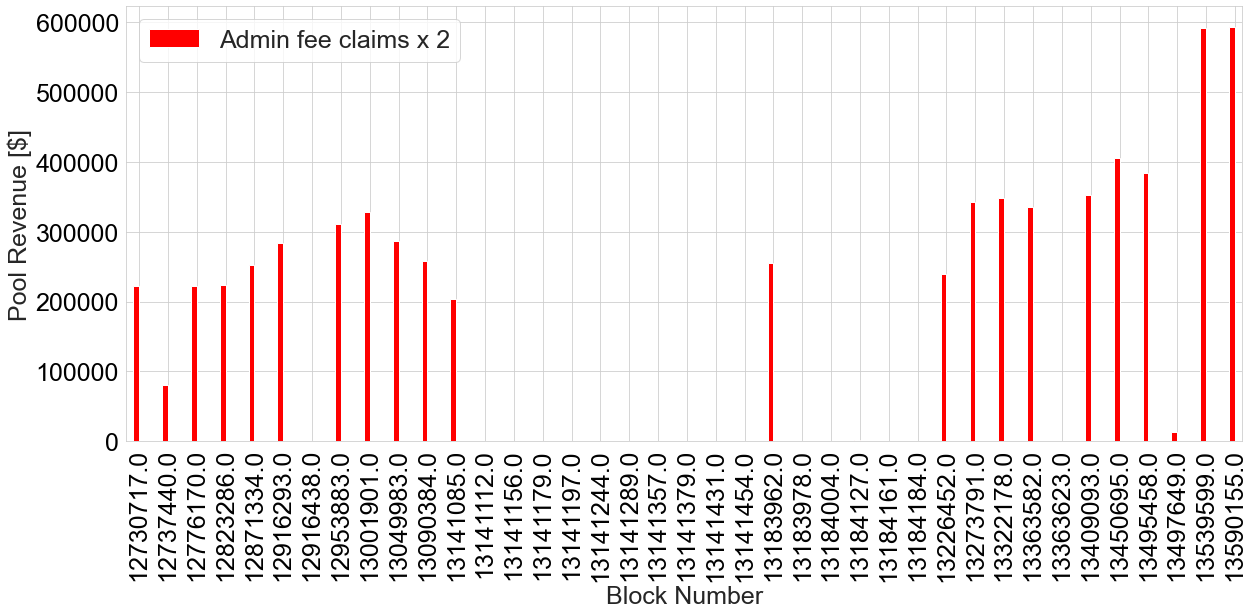

In [40]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

(df_fees['total_fees']*2).plot(
    ax=ax,
    color='red',
    kind='bar',
    label='Admin fee claims x 2',
    width=0.2,
    position=1,
)

ax.set_ylabel("Pool Revenue [$]", fontsize=25)
ax.set_xlabel("Block Number", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);

In [44]:
aggregated_claims = []
blocks = []
for (block_start, block_end) in subgraph_block_ranges:

    aggregated_claims.append(
        df_fees.total_fees.where(
            (block_start < df_fees.index) & (df_fees.index < block_end)
        ).sum()
    )
    blocks.append(block_end)

df_aggregated_claims = pd.DataFrame(data=aggregated_claims, index=blocks, columns=['claimed'])
df_aggregated_claims

,claimed
12739134,151514.091067
12786681,110806.354415
12832295,111845.950225
12874992,126325.794690
12917964,142409.080787
12961965,155580.623840
13007147,163841.749698
13052446,143581.592832
13097719,128857.272068
13142950,102121.989930


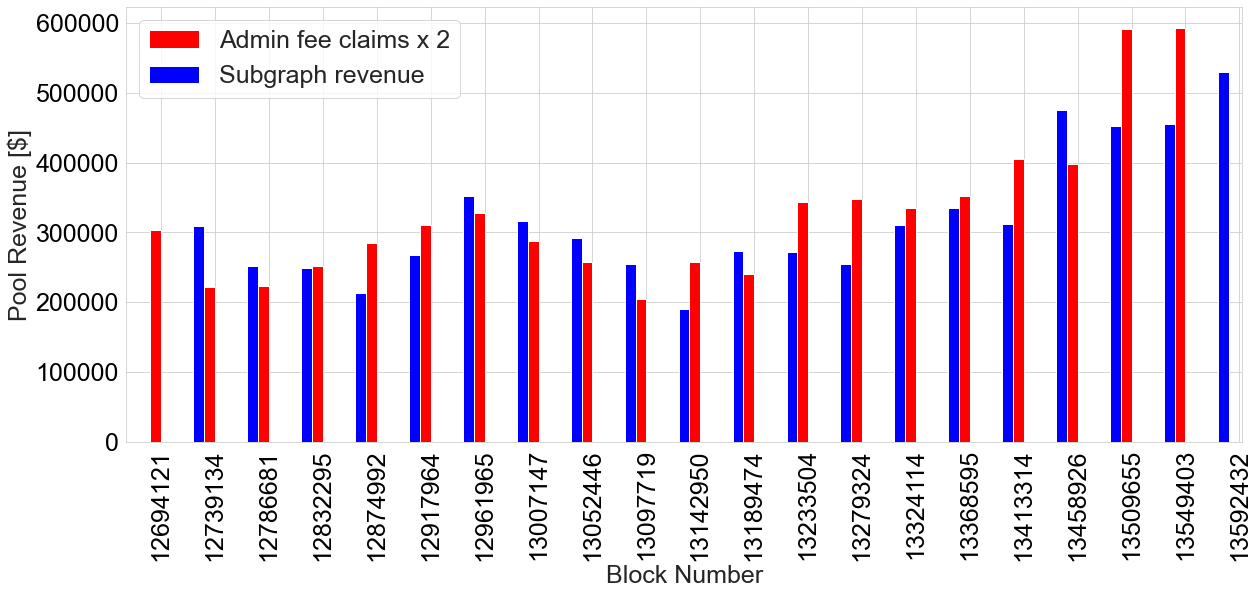

In [45]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

(df_aggregated_claims['claimed']*2).plot(
    ax=ax,
    color='red',
    kind='bar',
    label='Admin fee claims x 2',
    width=0.2,
    position=1,
)
subgraph_tripool_fees['fees'].plot(
    ax=ax,
    color='blue',
    kind='bar',
    label='Subgraph revenue',
    width=0.2,
    position=2,
)

ax.set_ylabel("Pool Revenue [$]", fontsize=25)
ax.set_xlabel("Block Number", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);